<a href="https://colab.research.google.com/github/Hoshi54/projects_ML/blob/main/Alfa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Baseline

In [ ]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)
import numpy as np

In [ ]:
!pip install feature_engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 1.3 MB/s eta 0:00:0000:0100:01m


## Загрузка данных

In [ ]:
train_df = pd.read_parquet('/Users/admin/Desktop/train.parquet')

ArrowInvalid: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.

In [ ]:
train_df.head()

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,...,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,target_1,target_2,total_target
0,0,48.871217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064993,33196.020871,1.229488,0.396969,323523.957625,12.420855,9.069157,1,1,1
1,1,19.530576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.270542,33195.488147,1.229488,-0.137339,145641.572203,2.124925,2.069157,0,0,0
2,2,9.706201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.431839,265071.236918,4.229488,3.595162,125727.062161,0.999583,1.069157,0,0,0
3,3,92.569902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.990581,495094.276542,9.229488,8.582252,370392.322955,3.066714,3.069157,0,0,0
4,4,26.538856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.393927,33196.317418,1.229488,0.276606,125726.775788,1.219935,1.069157,0,0,0


## Обработка данных

Для базовой модели отбросим отдельные таргеты и будем использовать только total_target.

In [ ]:
train_df.drop(["id", "target_2", "target_1"], axis=1, inplace=True)

Преобразуем тип категориальных признаков

In [ ]:
cat_cols = [
    'channel_code', 'city', 'city_type',
    'index_city_code', 'ogrn_month', 'ogrn_year',
    'branch_code', 'okved', 'segment'
]

In [ ]:
train_df[cat_cols] = train_df[cat_cols].astype("category")

In [ ]:
# train_df = train_df.drop(['max_end_plan_non_fin_deals', 'max_start_non_fin_deals',
#        'min_start_non_fin_deals', 'min_end_plan_non_fin_deals',
#        'max_start_fin_deals', 'min_end_fact_fin_deals', 'min_start_fin_deals',
#        'max_end_fact_fin_deals','okved','branch_code','channel_code'],axis = 1)

# train_df = train_df.drop(['balance_amt_max',
#  'cnt_days_cred_h_oper_1m',
#  'cnt_deb_e_oper_1m',
#  'sum_c_oper_1m',
#  'balance_amt_avg',
#  'sum_deb_g_oper_1m',
#  'cnt_b_oper_1m',
#  'cnt_deb_f_oper_3m',
#  'sum_deb_e_oper_1m',
#  'cnt_days_cred_f_oper_1m',
#  'sum_of_paym_1y',
#  'cnt_c_oper_1m',
#  'cnt_a_oper_1m',
#  'cnt_a_oper_3m',
#  'balance_amt_min',
#  'cnt_cred_g_oper_1m',
#  'max_founderpres'],axis = 1)


In [ ]:
# constant = DropConstantFeatures(tol=1)
# constant.fit(train_df)
# len(constant.features_to_drop_)

## Разбиение на train, validation

In [ ]:
x = train_df.drop("total_target", axis=1)
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(x)
sel.transform(x)
x

,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,balance_amt_avg,...,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m
0,48.871217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.704673e+04,...,0.515331,1.186720e+01,-0.354446,0.064993,3.319602e+04,1.229488,0.396969,3.235240e+05,12.420855,9.069157
1,19.530576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416714e+04,...,0.497933,1.204940e+01,0.358222,0.270542,3.319549e+04,1.229488,-0.137339,1.456416e+05,2.124925,2.069157
2,9.706201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.921524e+05,...,23.154435,6.374099e+06,29.426595,23.431839,2.650712e+05,4.229488,3.595162,1.257271e+05,0.999583,1.069157
3,92.569902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.424918e+05,...,9.378362,1.153105e+01,0.074660,0.990581,4.950943e+05,9.229488,8.582252,3.703923e+05,3.066714,3.069157
4,26.538856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.283253e+04,...,1.944106,1.232242e+01,0.447267,0.393927,3.319632e+04,1.229488,0.276606,1.257268e+05,1.219935,1.069157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.324653e+06,...,1.686092,1.224405e+01,0.415840,0.177506,2.038701e+06,51.229488,22.182922,2.006430e+05,3.963913,2.069157
359996,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.703910e+04,...,0.701205,1.203573e+01,0.546852,0.301299,3.319599e+04,1.229488,0.225770,1.257279e+05,1.114018,1.069157
359997,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.881385e+07,...,1.402768,1.208514e+01,0.101792,0.150675,2.151680e+05,16.229488,8.413681,1.309472e+07,5.397099,5.069157
359998,-999.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.068857e+05,...,0.459084,2.851429e+06,84.151652,53.062204,1.874074e+07,353.229488,58.237079,1.078043e+07,294.991216,67.069157


In [ ]:
sel = VarianceThreshold(threshold=0.01)
sel.fit(x)
sum(sel.get_support())

99

In [ ]:
corr_matrix = x.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
x = x.drop(to_drop, axis=1)
x.shape

(360000, 96)

In [ ]:
# duplicates = DropDuplicateFeatures()

# # find duplicated features in the train set
# duplicates.fit(x)
# duplicates.duplicated_feature_sets_

KeyboardInterrupt: 

In [ ]:
stop

In [ ]:
cat_cols1=['ogrn_month','ogrn_year','segment','city','city_type','index_city_code']
for col in cat_cols:
    if x[col].dtype.name == 'category':
        x[col] = x[col].cat.add_categories('-1').fillna('-1')
    else:
        x[col] = x[col].fillna('-1')
y = train_df.total_target
# x_train, x_val, y_train, y_val = train_test_split(x, y,
#                                                   test_size=0.2,
#                                                   random_state=42)
# threshold = 0.6
# cols_to_drop = train_df.columns[train_df.isnull().sum() / len(train_df) > threshold]
# train_df.drop(cols_to_drop, axis=1, inplace=True)
# train_df.isnull().sum() / len(train_df)

# train_df = train_df.dropna(thresh=threshold * train_df.shape[0], axis=1)
# train_df = train_df.dropna(thresh=threshold * train_df.shape[1], axis=0)

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def determine_folds(n_unique_values):
    if n_unique_values < 80:
        return 10
    elif n_unique_values <= 120:
        return 15
    elif n_unique_values <= 180:
        return 25
    elif n_unique_values <= 300:
        return 35
    else:
        return 50

# # Применение StratifiedKFold для каждого столбца
# for column in x.columns:
#     n_unique_values = x[column].nunique()
#     n_splits = determine_folds(n_unique_values)
#     skf = StratifiedKFold(n_splits=n_splits)
#     # print(f'after{x[column]}')
#     # print(f'after{skf}')

#уникальные корзины
def bin_column(column, n_bins):
    special_value = -99909090
    column_filled = column.fillna(special_value)

    binned = pd.qcut(column_filled, q=n_bins, labels=False, duplicates='drop')

    binned[column.isna()] = -1

    return binned

# Применение разбиения для каждого столбца
for column in x.columns:
    if column not in cat_cols:
        print(f'before{x[column]}')
        n_unique_values = x[column].nunique()
        n_bins = determine_folds(n_unique_values)
        x[column] = bin_column(x[column], n_bins)
        print(f'after{x[column]}')


before0          48.871217
1          19.530576
2           9.706201
3          92.569902
4          26.538856
             ...    
359995   -999.000000
359996   -999.000000
359997   -999.000000
359998   -999.000000
359999   -999.000000
Name: rko_start_months, Length: 360000, dtype: float64
after0         33
1         17
2          7
3         44
4         21
          ..
359995     0
359996     0
359997     0
359998     0
359999     0
Name: rko_start_months, Length: 360000, dtype: int64
before0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
359995   NaN
359996   NaN
359997   NaN
359998   NaN
359999   NaN
Name: max_end_fact_fin_deals, Length: 360000, dtype: float64
after0        -1
1        -1
2        -1
3        -1
4        -1
         ..
359995   -1
359996   -1
359997   -1
359998   -1
359999   -1
Name: max_end_fact_fin_deals, Length: 360000, dtype: int64
before0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
359995   NaN
3599

413431

## Обучение базовой модели

В качестве базовой модели возьмем LGBMClassifier

In [ ]:
# model = LGBMClassifier(verbosity=-1, random_state=42)
# model.fit(x_train, y_train)

In [ ]:
stop

In [ ]:
from catboost import CatBoostClassifier, Pool
import catboost as cb

# x = x[selected_features]
# cat_cols1=[]
# for i in selected_features:
#     if i in cat_cols:
#         cat_cols1.append(i)
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=10)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=10)
simpleboostmodel = CatBoostClassifier()
simpleboostmodel.fit(x_train, y_train, eval_set=(x_valid, y_valid),cat_features=cat_cols, verbose=False)
simple_boost_preds_train = simpleboostmodel.predict_proba(x_valid)[:,1]
roc_auc_score(y_valid, simple_boost_preds_train)

0.9100724556489262

In [ ]:
import shap
explainer = shap.TreeExplainer(simpleboostmodel)
shap_values = explainer(x_train)

In [ ]:
shap.initjs()
shap.plots.force(shap_values[0])

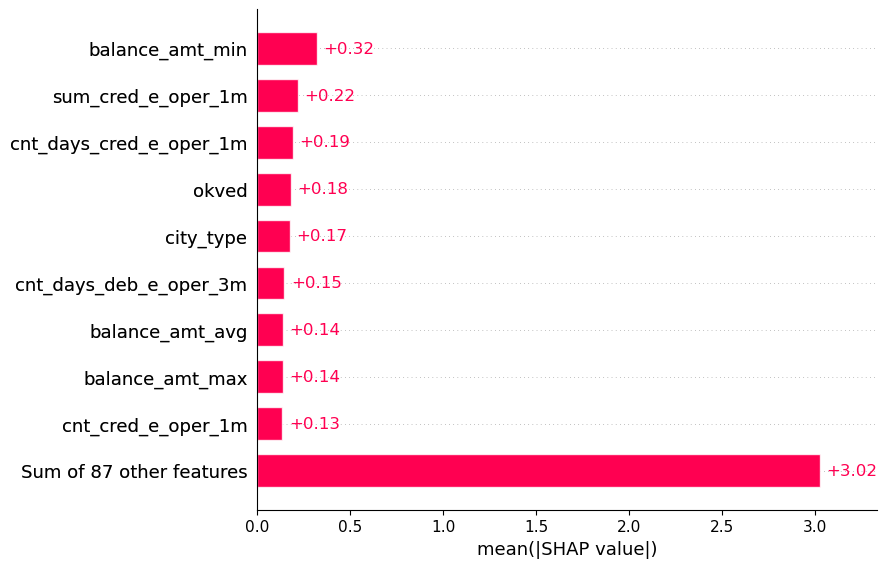

In [ ]:
shap.plots.bar(shap_values)

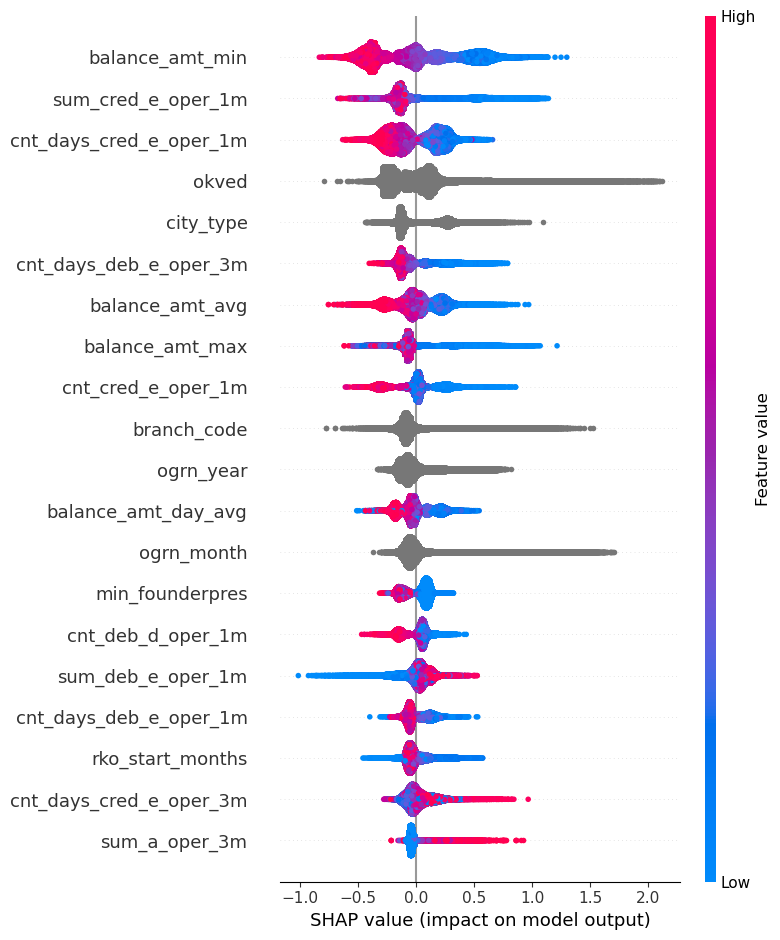

In [ ]:
shap.summary_plot(shap_values, x_train)

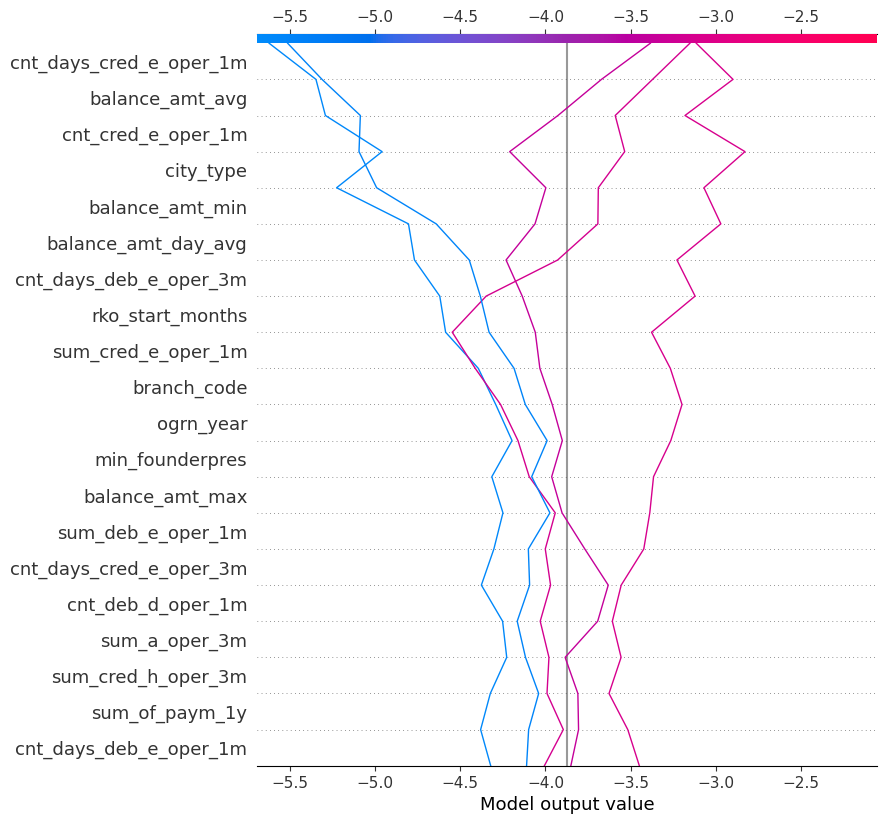

In [ ]:
shap_values = explainer.shap_values(x_train)
shap.decision_plot(explainer.expected_value,
                  shap_values[:5],x_train)

In [ ]:
train_df[train_df[['balance_amt_min','sum_cred_e_oper_1m','cnt_days_cred_e_oper_1m','cnt_days_cred_e_oper_3m']].isnull()]

,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,balance_amt_avg,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,total_target
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
359998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,7),dpi = 200)
imp_df = pd.DataFrame({'col':x.columns,'imp':simpleboostmodel.feature_importances_}).sort_values('imp',ascending = False)

<Figure size 2400x1400 with 0 Axes>

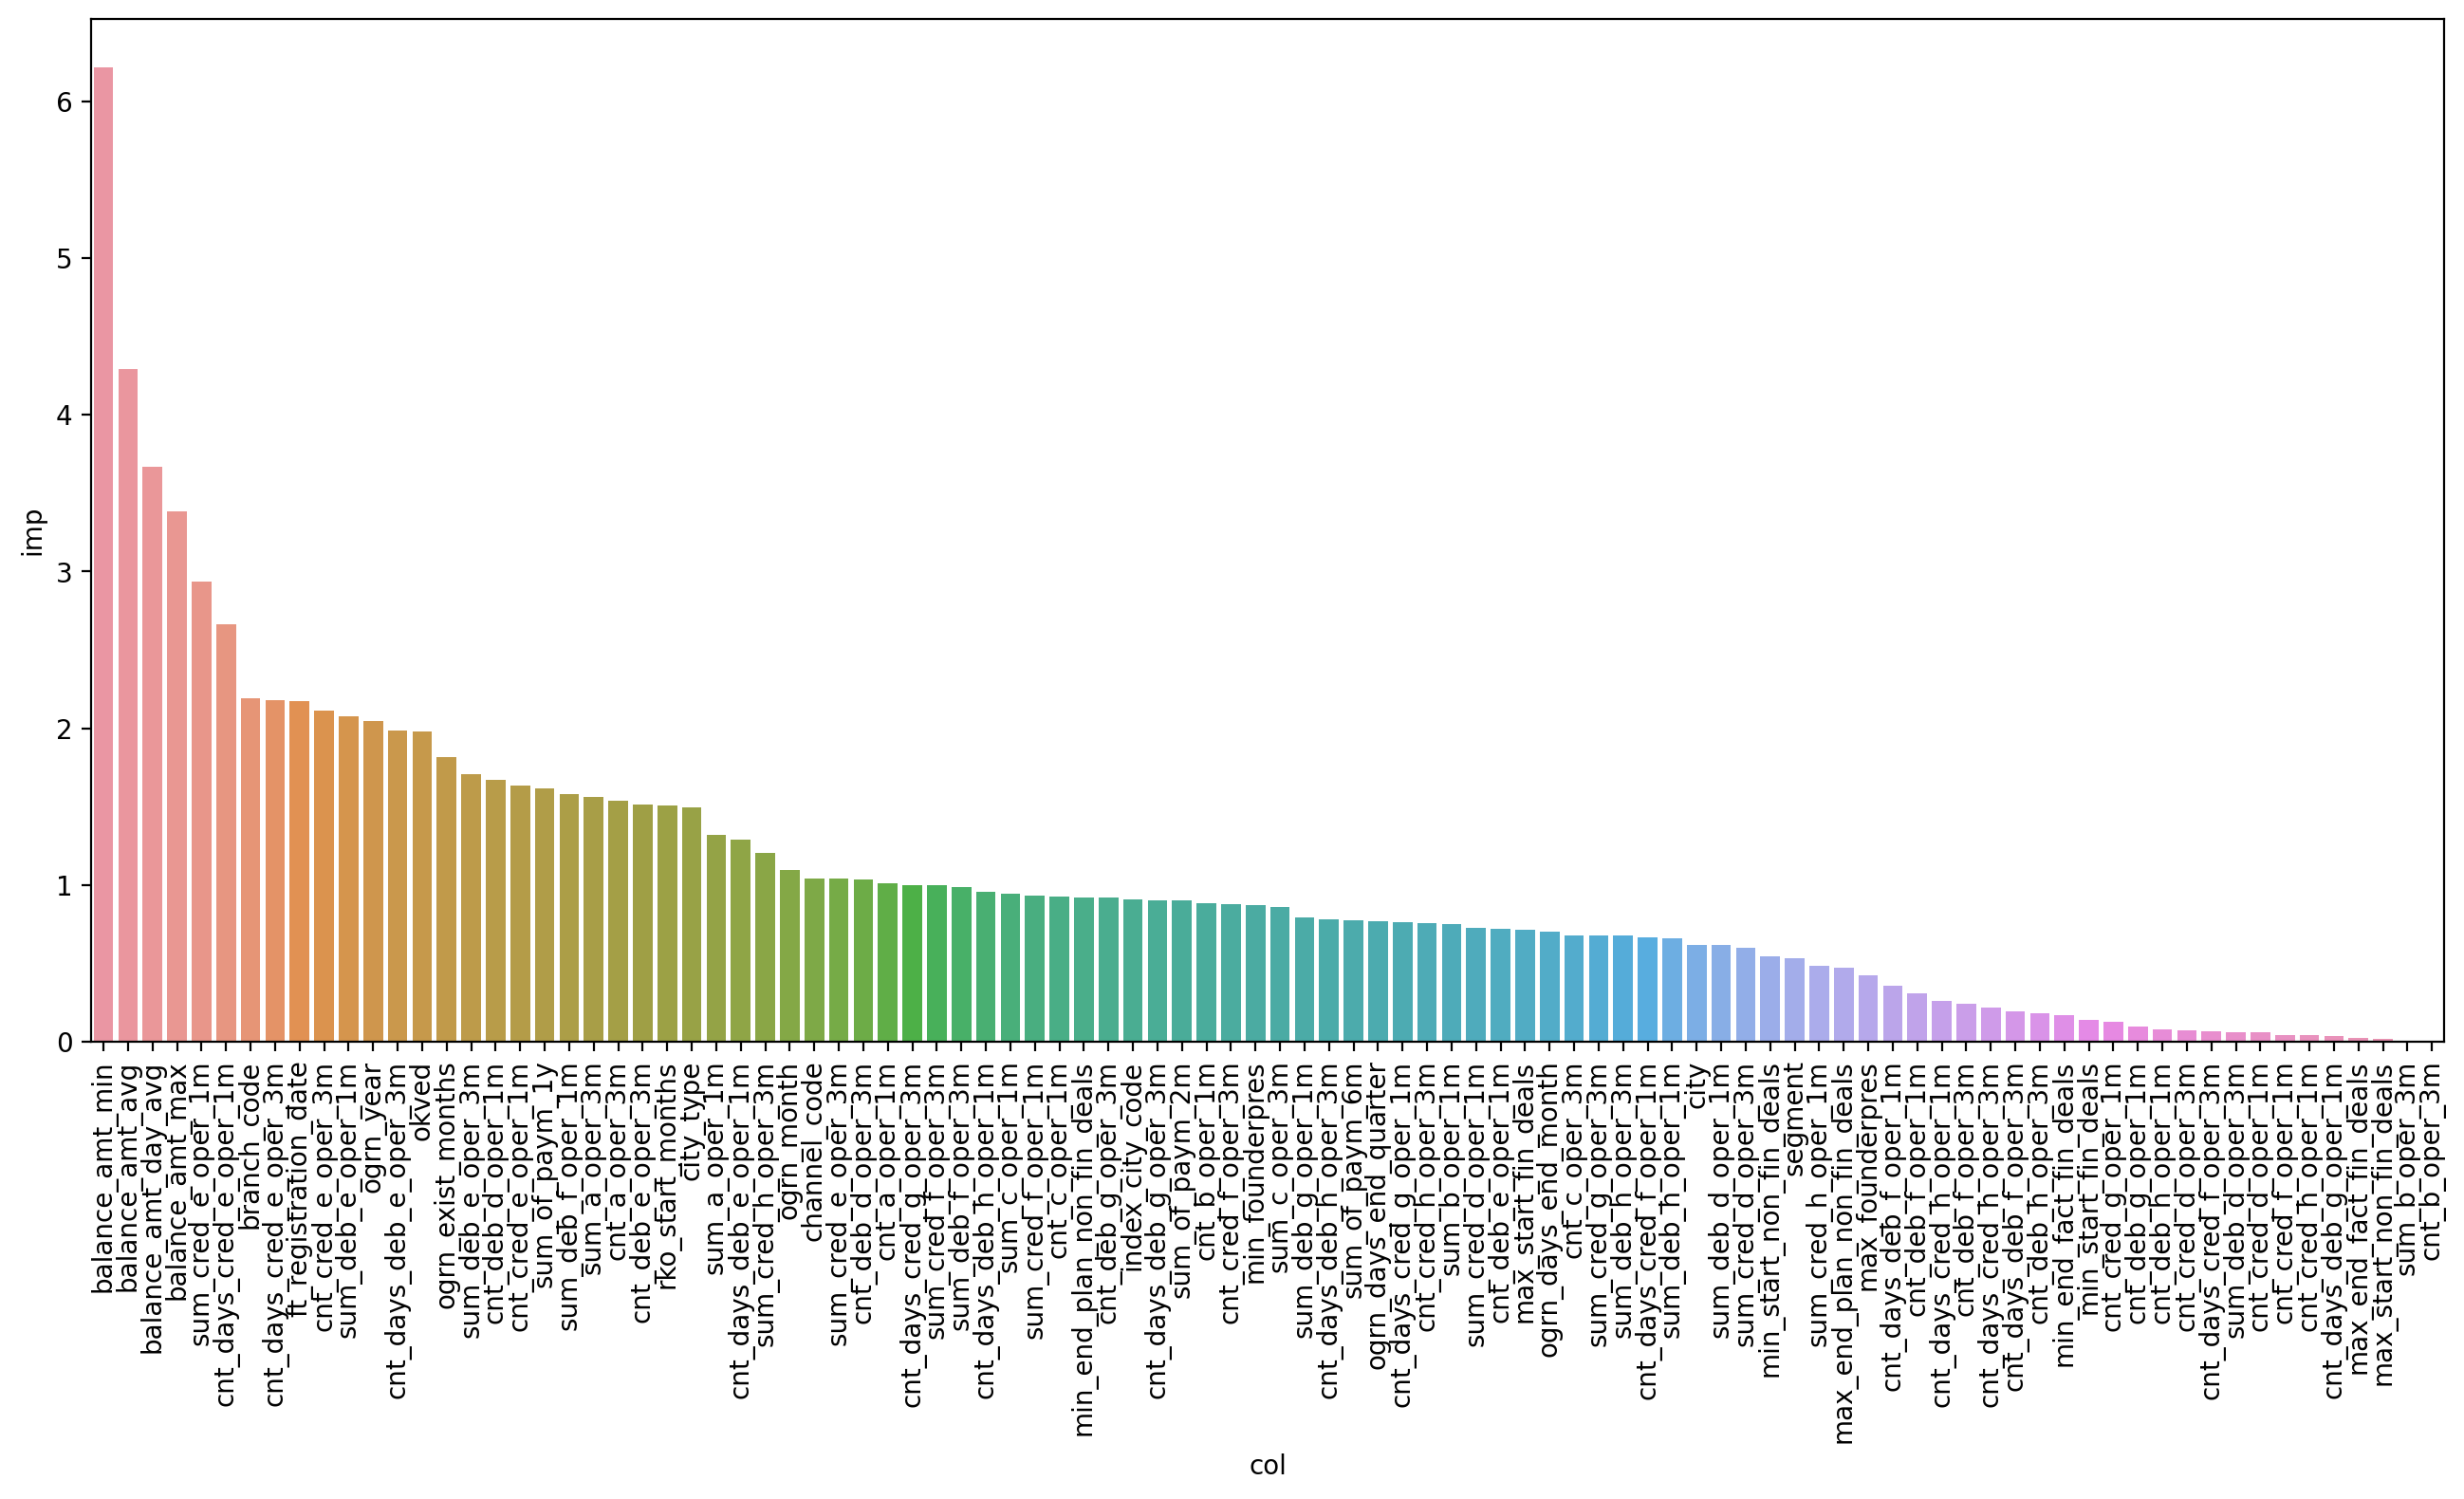

In [ ]:
plt.figure(figsize = (16,7),dpi = 200)
sns.barplot(data = imp_df,x = 'col',y = 'imp')
plt.xticks(rotation = 90);

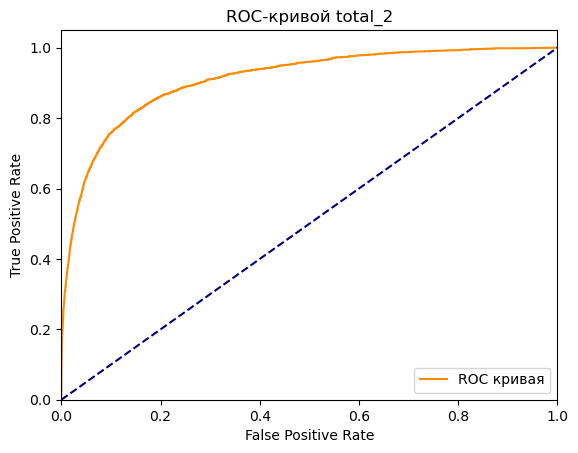

In [ ]:
from sklearn.metrics import roc_curve, auc
lr_probs = simpleboostmodel.predict_proba(x_valid)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_valid, lr_probs)

fpr, tpr, treshold = roc_curve(y_valid, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color = 'darkorange',
         label = 'ROC кривая' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривой total_2')
plt.legend(loc="lower right")
plt.show()

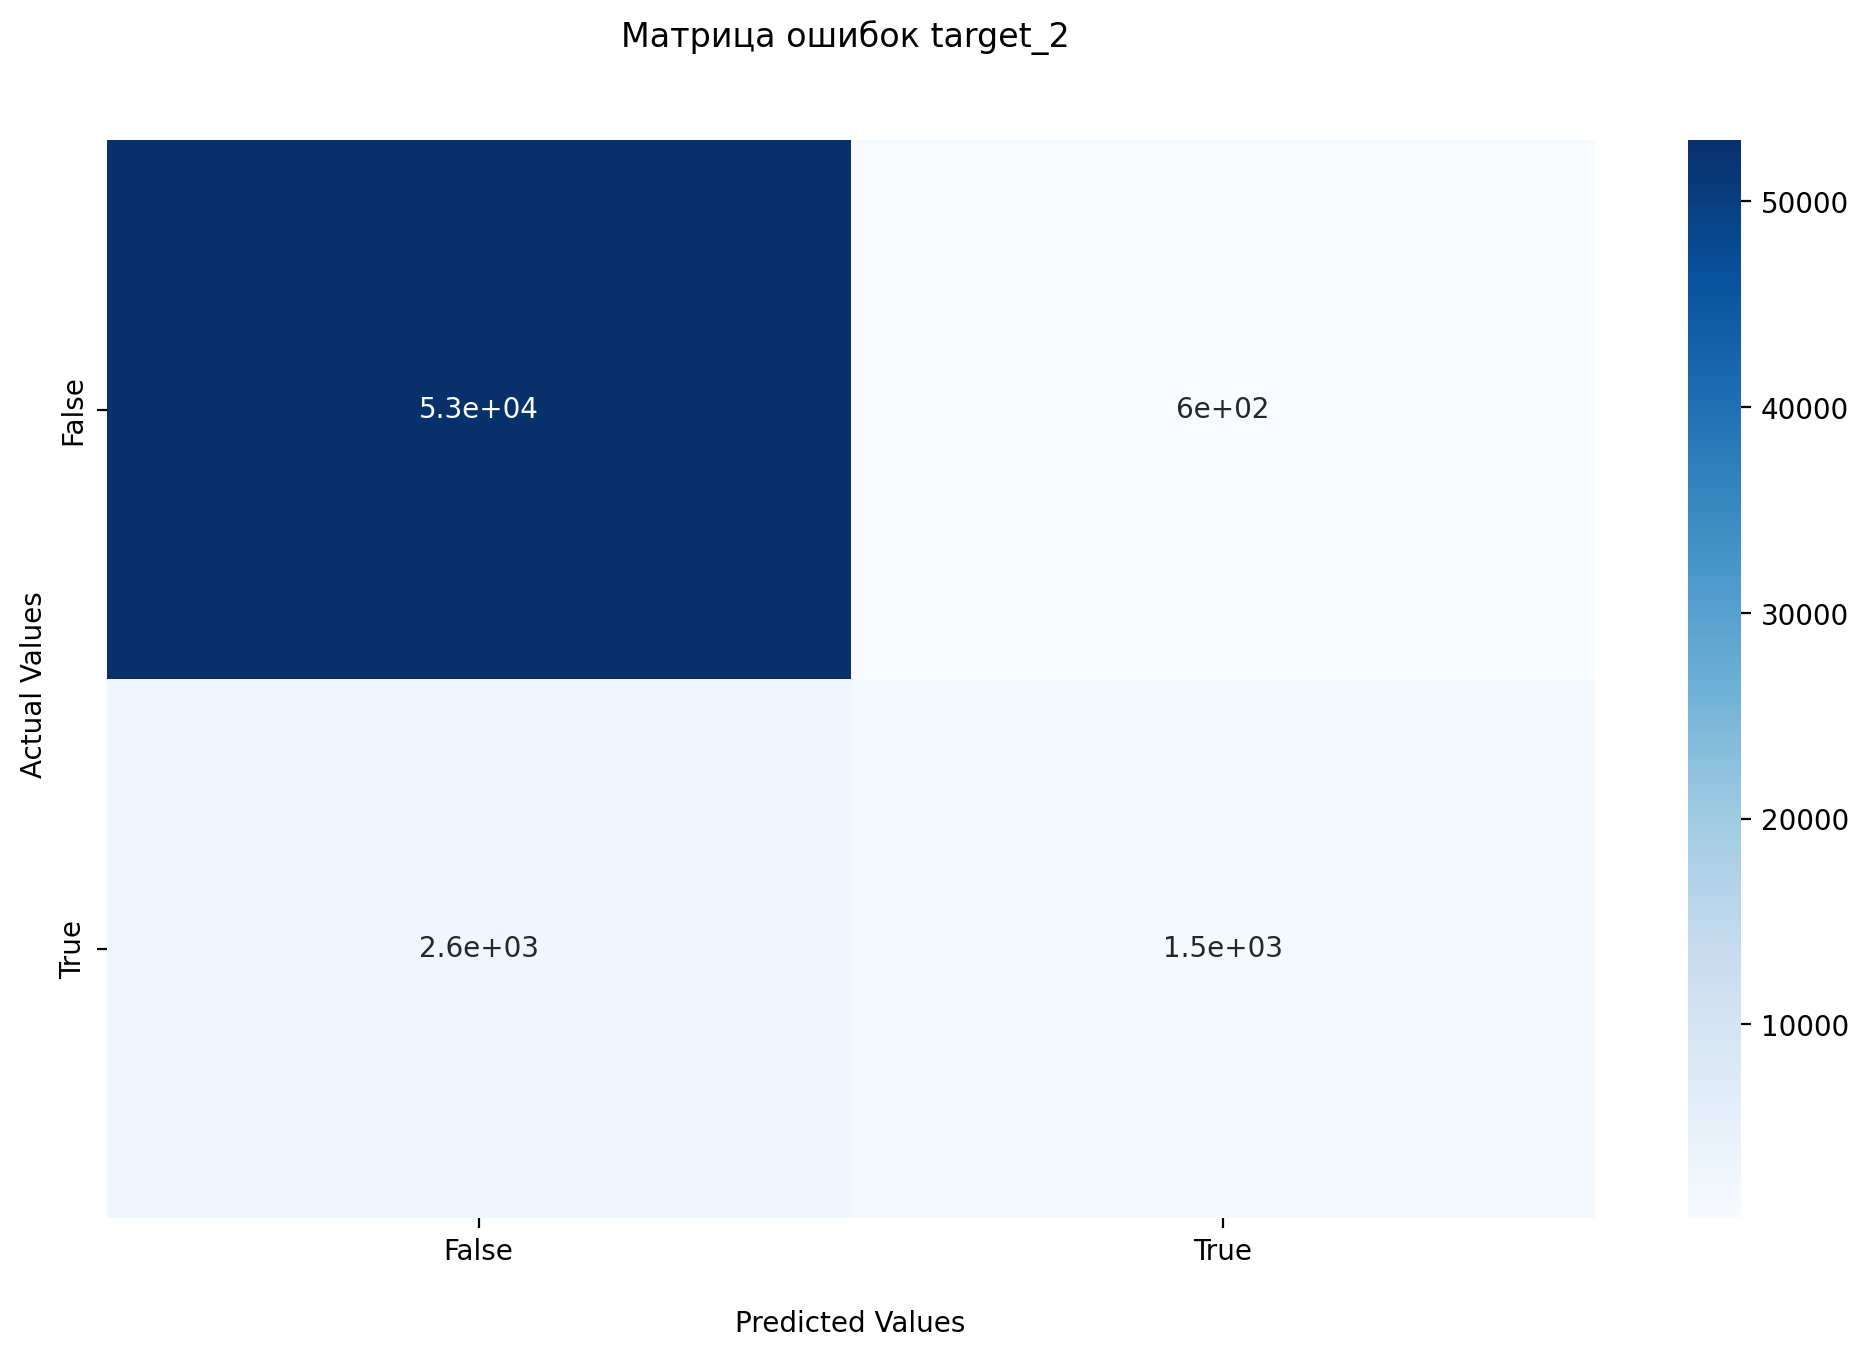

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     53550
           1       0.71      0.36      0.48      4050

    accuracy                           0.94     57600
   macro avg       0.83      0.67      0.72     57600
weighted avg       0.94      0.94      0.94     57600



array([[52949,   601],
       [ 2591,  1459]])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
pred = simpleboostmodel.predict(x_valid)
cf = confusion_matrix(y_valid,pred)

plt.figure(figsize = (12,7),dpi = 200)
ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Матрица ошибок target_2 \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()
print(classification_report(y_valid,pred))
confusion_matrix(y_valid,pred)

In [ ]:
# from catboost import CatBoostClassifier, Pool
# import catboost as cb
# # x = x[selected_features]
# x_train, x_val, y_train, y_val = train_test_split(x, y,
#                                                   test_size=0.2,
#                                                   random_state=10)

# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# simpleboostmodel = CatBoostClassifier(
#     depth=12,
#     eval_metric = 'AUC:hints=skip_train~false',
#     learning_rate= 0.085,
#     cat_features=cat_cols,
#     random_seed=10,
#     bagging_temperature=1)
# simpleboostmodel.fit(x_train, y_train, eval_set=(x_valid, y_valid),cat_features=cat_cols, verbose=False)
# simple_boost_preds_train = simpleboostmodel.predict_proba(x_valid)[:,1]
# roc_auc_score(y_valid, simple_boost_preds_train)

In [ ]:
simple_boost_preds = simpleboostmodel.predict_proba(x_val)[:,1]
roc_auc_score(y_val, simple_boost_preds)

0.9101110567154727

In [ ]:
stop

In [ ]:
import numpy as np
feature_importances = simpleboostmodel.get_feature_importance()
threshold = 0.0000001
selected_features = np.array(simpleboostmodel.feature_names_)[feature_importances > threshold]
print(feature_importances)
x_train[selected_features]
print(x_train[selected_features])

In [ ]:
stop

In [ ]:
from catboost import CatBoostClassifier, Pool
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
complex_boost_model = CatBoostClassifier(
    loss_function = 'Logloss',
    cat_features=cat_cols,
    bootstrap_type = 'Bayesian',
    random_seed = 10,
    verbose=False,
    eval_metric = 'AUC',
    bagging_temperature=1)
search_catboost= complex_boost_model.grid_search({'max_depth': [4,8],
                       'learning_rate': np.linspace(0.01,0.1)},
                      x_train,
                      y_train,
                      cv=10)
search_catboost['params']

In [ ]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np

def hyperopt_objective(params):
    model = CatBoostClassifier(
        loss_function='Logloss',
        cat_features=cat_cols,
        bootstrap_type='Bayesian',
        random_seed=10,
        verbose=False,
        eval_metric='AUC',
        bagging_temperature=1,
        task_type='GPU',
        **params
    )

    score = cross_val_score(model, x_train, y_train, scoring='roc_auc', cv=10)
    return -np.mean(score)

space = {
    'max_depth': hp.choice('max_depth', [4, 8]),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1)
}

# Запуск оптимизации
trials = Trials()
best_params = fmin(
    fn=hyperopt_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=trials
)

print("Лучшие гиперпараметры:", best_params)


In [ ]:
# final_model = CatBoostClassifier(
#     depth=4,
#     eval_metric = 'AUC:hints=skip_train~false',
#     learning_rate= 0.08636363636363636,
#     cat_features=cat_cols,
#     random_seed=10,
#     bagging_temperature=1)
# final_model.fit(x_train, y_train, eval_set=(x_valid, y_valid),cat_features=cat_cols, verbose=False)
# pred_final_model = final_model.predict_proba(x_train)[:,1]
# roc_auc_score(y_train, pred_final_model)
# pred_final_model_valid = final_model.predict_proba(x_valid)[:,1]
# roc_auc_score(y_valid, pred_final_model_valid)

Качество получилось довольно неплохим, но его еще можно улучшить

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.layers import Conv2D, BatchNormalization, Activation, Dropout, MaxPooling2D

# for col in cat_cols:
#     # Находим максимальное значение в столбце и добавляем 1, чтобы получить уникальный идентификатор для 'missing'
#     missing_value = 999999999

#     # Заменяем 'missing' на уникальный идентификатор
#     x[col] = x[col].replace('missing', missing_value)
# x = x.fillna(999999999)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size=0.2,
                                                  random_state=42)
# def custom_scaler(column, ignore_val=999999):
#     if column.dtype.name == 'category':
#         return column  # Возвращаем категориальный столбец без изменений
#     mean = column[column != ignore_val].mean()
#     std = column[column != ignore_val].std()
#     normalized_column = np.where(column == ignore_val, column, (column - mean) / std)
#     return normalized_column

# for col in x_train.columns:
#     x_train[col] = custom_scaler(x_train[col])
#     x_test[col] = custom_scaler(x_test[col])


scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = Sequential([
    Dense(256, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
# model = load_model('best_model_case2_new.h5')
# EarlyStopping: остановка обучения, если auc_roc не улучшается в течение 10 эпох
early_stopping = EarlyStopping(monitor='val_auc_roc', patience=10, mode='max', restore_best_weights=True)

# ModelCheckpoint: сохранение лучшей модели
model_checkpoint = ModelCheckpoint('case2_2.h5', monitor='val_auc_roc', mode='max', save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC(name='auc_roc')])

# Обучение модели с коллбэками
history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=64,
    validation_data=(x_valid, y_valid),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/100
3600/3600 [==============================] - 5s 1ms/step - loss: 0.2196 - auc_roc: 0.8209 - val_loss: 0.1822 - val_auc_roc: 0.8716
Epoch 2/100
 138/3600 [>.............................] - ETA: 3s - loss: 0.1762 - auc_roc: 0.8641

/Users/mihailskorohodov/anaconda3/envs/case/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3600/3600 [==============================] - 4s 1ms/step - loss: 0.1855 - auc_roc: 0.8664 - val_loss: 0.1810 - val_auc_roc: 0.8743
Epoch 3/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1822 - auc_roc: 0.8719 - val_loss: 0.1781 - val_auc_roc: 0.8771
Epoch 4/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1794 - auc_roc: 0.8762 - val_loss: 0.1776 - val_auc_roc: 0.8786
Epoch 5/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1784 - auc_roc: 0.8781 - val_loss: 0.1786 - val_auc_roc: 0.8792
Epoch 6/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1771 - auc_roc: 0.8807 - val_loss: 0.1764 - val_auc_roc: 0.8824
Epoch 7/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1764 - auc_roc: 0.8820 - val_loss: 0.1768 - val_auc_roc: 0.8806
Epoch 8/100
3600/3600 [==============================] - 4s 1ms/step - loss: 0.1749 - auc_roc: 0.8848 - val_loss: 0.1754 - val_auc_roc: 0.8823
Epoch 9/100

NameError: name 'roc_auc' is not defined

In [ ]:
import numpy as np

In [ ]:
from catboost.utils import get_gpu_device_count

# Проверка доступности GPU
if get_gpu_device_count() > 0:
    print("GPU доступен для CatBoost")
else:
    print("GPU не доступен для CatBoost")

## Выгрузка результатов

In [ ]:
test_df = pd.read_parquet('test.parquet')

In [ ]:
test_df

,id,rko_start_months,max_end_fact_fin_deals,max_end_plan_non_fin_deals,max_start_fin_deals,max_start_non_fin_deals,min_end_fact_fin_deals,min_end_plan_non_fin_deals,min_start_fin_deals,min_start_non_fin_deals,...,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m
0,360000,61.061808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,51005.755087,4.275226,4.257042,33195.968822,1.229488,0.359263,3.014421e+05,7.049883,7.069157
1,360001,16.803743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,11.888083,0.275226,0.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157
2,360002,15.448904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,11.888083,0.275226,0.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157
3,360003,11.287614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,11.888083,0.275226,0.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157
4,360004,7.997291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,11.888083,0.275226,0.257042,135758.248681,2.229488,1.359263,1.267421e+05,2.049883,2.069157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,459995,19.836001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.531871,11.888083,0.275226,0.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157
99996,459996,49.319872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.531871,11.888083,0.275226,0.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157
99997,459997,43.965033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.531871,11.888083,0.275226,0.257042,76611.048681,6.229488,5.359263,1.257277e+05,1.049883,1.069157
99998,459998,38.255356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.531871,15005.755087,1.275226,1.257042,33195.968822,1.229488,0.359263,1.257277e+05,1.049883,1.069157


In [ ]:
# test_df = test_df[selected_features]
test_df[cat_cols] = test_df[cat_cols].astype("category")
x1 = test_df.drop("id", axis=1)
# x1=test_df
for col in cat_cols:
    if x1[col].dtype.name == 'category':
        x1[col] = x1[col].cat.add_categories('-1').fillna('-1')
    else:
        x1[col] = x1[col].fillna('-1')

In [ ]:
# x1 = test_df.drop("total_target", axis=1)
from sklearn.feature_selection import VarianceThreshold
# sel = VarianceThreshold(threshold=0)
# sel.fit(x1)
# sel.transform(x1)
x1 = x1.drop(to_drop, axis=1)
import pandas as pd
from sklearn.model_selection import StratifiedKFold

def determine_folds(n_unique_values):
    if n_unique_values < 80:
        return 10
    elif n_unique_values <= 120:
        return 15
    elif n_unique_values <= 180:
        return 25
    elif n_unique_values <= 300:
        return 35
    else:
        return 50

# # Применение StratifiedKFold для каждого столбца
# for column in x.columns:
#     n_unique_values = x[column].nunique()
#     n_splits = determine_folds(n_unique_values)
#     skf = StratifiedKFold(n_splits=n_splits)
#     # print(f'after{x[column]}')
#     # print(f'after{skf}')

def bin_column(column, n_bins):
    special_value = -99909090
    column_filled = column.fillna(special_value)

    binned = pd.qcut(column_filled, q=n_bins, labels=False, duplicates='drop')

    binned[column.isna()] = -1

    return binned

# Применение разбиения для каждого столбца
for column in x1.columns:
    if column not in cat_cols:
        print(f'before{x1[column]}')
        n_unique_values = x1[column].nunique()
        n_bins = determine_folds(n_unique_values)
        x1[column] = bin_column(x1[column], n_bins)
        print(f'after{x1[column]}')


before0        61.061808
1        16.803743
2        15.448904
3        11.287614
4         7.997291
           ...    
99995    19.836001
99996    49.319872
99997    43.965033
99998    38.255356
99999    28.094066
Name: rko_start_months, Length: 100000, dtype: float64
after0        39
1        14
2        13
3         8
4         3
         ..
99995    17
99996    34
99997    31
99998    29
99999    23
Name: rko_start_months, Length: 100000, dtype: int64
before0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
99995   NaN
99996   NaN
99997   NaN
99998   NaN
99999   NaN
Name: max_end_fact_fin_deals, Length: 100000, dtype: float64
after0       -1
1       -1
2       -1
3       -1
4       -1
        ..
99995   -1
99996   -1
99997   -1
99998   -1
99999   -1
Name: max_end_fact_fin_deals, Length: 100000, dtype: int64
before0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
99995   NaN
99996   NaN
99997   NaN
99998   NaN
99999   NaN
Name: max_end_plan

In [ ]:
test_score = simpleboostmodel.predict_proba(x1)[:, 1]

In [ ]:
sample_submission_df = pd.read_csv("sample_submission.csv")

In [ ]:
sample_submission_df.head()

,id,score
0,360000,0.5
1,360001,0.5
2,360002,0.5
3,360003,0.5
4,360004,0.5


In [ ]:
sample_submission_df["score"] = test_score

In [ ]:
sample_submission_df.head()

,id,score
0,360000,0.179059
1,360001,0.019039
2,360002,0.152219
3,360003,0.043042
4,360004,0.016238


In [ ]:
sample_submission_df.to_csv("my_submission.csv", index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM, Dropout,GRU,BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from talib import *
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from skopt.space import Integer
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR
from keras.losses import binary_crossentropy
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras import backend as K

ModuleNotFoundError: No module named 'talib'

In [ ]:
is_na_cells = x.isna().sum()
is_na_cells = is_na_cells[is_na_cells > 0]

# Вывод результатов
print(is_na_cells)
# Перебор всех строк DataFrame
for index, row in x.iterrows():
    # Для каждой строки проверяем каждый столбец с NaN
    for col in columns_with_nan:
        # Проверяем, является ли значение в этом столбце NaN
        if pd.isna(row[col]):
            # Выводим информацию о столбце и индексе строки
            print(f"Строка {index}, Столбец {col}, Значение {row[col]}")